In [1]:
# Importing all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [2]:
# Importing and collecting data
logicreg=pd.read_csv("./LogReg_Data.csv")
x=logicreg.drop(columns=['Class','Sample code number'])
y=logicreg['Class']
x=np.array(x)
y=np.array(y)
print(f"Shape of X : {x.shape}")
print(f"Shape of Y : {y.shape}")

Shape of X : (683, 9)
Shape of Y : (683,)


In [3]:
# Adding X0 to X
x1 = np.c_[np.ones(x.shape[0]),x]

# Changing the range of y
y=(y/2)-1

# Splitting the data into training and testing set
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=0)

In [4]:
# Defining the Sigmoid function
def sigmoid(xb):
    return (1.0 / (1.0 + np.exp(-1.0*xb)))

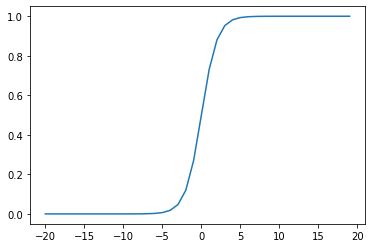

In [5]:
# Drawing the graph for the Sigmoid function
sx=range(-20,20)
sy=[]
for i in sx:
    sy.append(sigmoid(i))

plt.plot(sx,sy)
plt.show()

In [6]:
# Defining the prediction function, value of W is taken from the gradienst function
def predict(X):
    predicted_y=[]
    
    for xa in X:
        
        logit = xa.dot(W) #ϴ0*1+ϴ1*X
        predicted_y.append(sigmoid(logit)) 
        
    return np.array(predicted_y)

In [7]:
# Defining the Cost function
def cost_function(predicted_y,y_train,size): 

    cf=-(1/size)*np.sum( y_train*np.log(predicted_y) + (1-y_train)*np.log(1-predicted_y))
    return cf

In [8]:
# Our model to find the value of W with the least Cost
def model(X, Y, learning_rate, iterations):
    
    global W
    W=np.zeros(x1.shape[1])
    cost_list = []
    
    for i in range(iterations):
        
        # Predicting the values for our test data
        Yhat = sigmoid(np.dot(W, X.T))
        
        # Cost function
        cost = cost_function(Yhat,Y,X.shape[1])
        
        # Gradient Descent
        dW = (1/X.shape[1])*np.dot(Yhat-Y, X)
        
        W = W - learning_rate*dW.T
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print(f"Epoch: {i}, Cost: {cost}")
        
    return W, cost_list

Epoch: 0, Cost: 37.84583605857301
Epoch: 10000, Cost: 4.166028173243731
Epoch: 20000, Cost: 4.160746967615837
Epoch: 30000, Cost: 4.160653192330925
Epoch: 40000, Cost: 4.160651248754375
Epoch: 50000, Cost: 4.160651207622062
Epoch: 60000, Cost: 4.160651206748953
Epoch: 70000, Cost: 4.160651206730409
Epoch: 80000, Cost: 4.160651206730015
Epoch: 90000, Cost: 4.160651206730009
[]


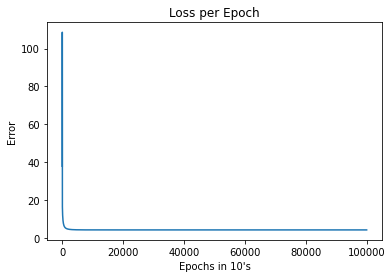

In [9]:
learning_rate= 0.003 #@param{type:"number"}
epochs= 100000 #@param {type:"slider", min:0, max:100000, step:100}
W,total_error=model(x_train,y_train,learning_rate,epochs)
 
plt.plot(range(epochs),total_error)
plt.title("Loss per Epoch")
plt.xlabel("Epochs in 10's")
plt.ylabel("Error")
print(plt.plot())

In [10]:
# Predicting the Data between 0 and 1
yhat= predict(x_test) 
#print(yhat) [To find the value of 'a' manually]

a=0.3  #@param {type:"slider", min:-0.5, max:0.5, step:0.01}

# If the score is above 'a' we make it 1, else 0
for i,v in enumerate(yhat):
  if v >=a: 
      yhat[i]=1
  else:
      yhat[i]=0

# To cross-check our predicted and actual data manually
print(yhat)
print(y_test)

[0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0.]
[0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0.]


In [11]:
# To find the error and accuracy of our model
error=sum((yhat-y_test)**2)
print(error)
accuracy=1-(error/100)
print(accuracy)   
print()
print(metrics.confusion_matrix(y_test, yhat ,labels=[0, 1])) # Confusion Matrix of our model
print()
print(metrics.classification_report(y_test, yhat, labels=[0, 1])) # Classification report of our model

4.0
0.96

[[83  4]
 [ 0 50]]

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        87
           1       0.93      1.00      0.96        50

    accuracy                           0.97       137
   macro avg       0.96      0.98      0.97       137
weighted avg       0.97      0.97      0.97       137



In [12]:
# Using Sklearn Linear Regression Model for our data
clf.fit((x_train),(y_train)) 
predict_y=clf.predict((x_test))

# To find error and accuracy
error=sum((predict_y-(y_test))**2)
print(error)
accuracy=1-(error/100)
accuracy

6.0


0.94